In [0]:
%matplotlib inline


# Various Agglomerative Clustering on a 2D embedding of digits


An illustration of various linkage option for agglomerative clustering on
a 2D embedding of the digits dataset.

The goal of this example is to show intuitively how the metrics behave, and
not to find good clusters for the digits. This is why the example works on a
2D embedding.

What this example shows us is the behavior "rich getting richer" of
agglomerative clustering that tends to create uneven cluster sizes.
This behavior is pronounced for the average linkage strategy,
that ends up with a couple of singleton clusters, while in the case
of single linkage we get a single central cluster with all other clusters
being drawn from noise points around the fringes.



Automatically created module for IPython interactive environment
Computing embedding
Done.
ward :	0.31s
average :	0.25s
complete :	0.23s
single :	0.12s


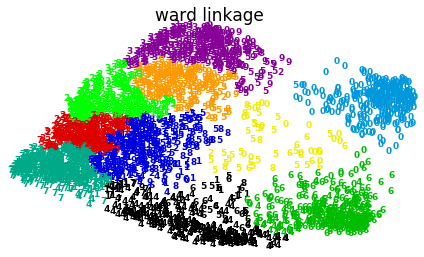

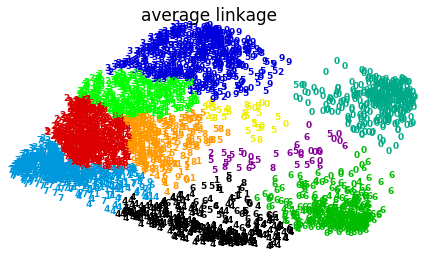

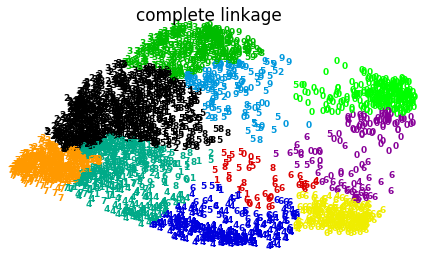

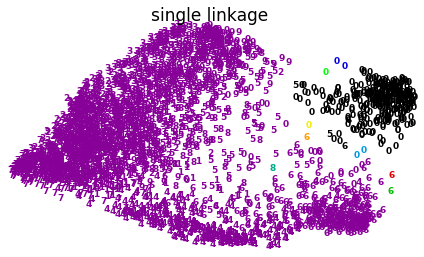

In [0]:
# Authors: Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2014

print(__doc__)
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)


#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

An illustration of various linkage option for agglomerative clustering on
a randomly generated dataset.
What this example shows us is the behavior "rich getting richer" of
agglomerative clustering that tends to create uneven cluster sizes.
Graphs help to visualize distribution of cluster sizes for each linkage type
and compare where behavior is more pronounced between average, ward & complete
linkage strategy. We can see that Ward creates more equally sized clusters.
Using random data helps to strengthen this notion.